In [15]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('sunflower.jpg')

# Resize the image (optional)
# image = cv2.resize(image, (640, 480))

# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Flatten the image into a 2D array
pixels = lab_image.reshape((-1, 3))

# Perform K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(pixels)

# Reshape the labels back to the original image
segmented_image = labels.reshape(lab_image.shape[:2])

# Enhance specific regions (change contrast and brightness)
enhanced_image = np.copy(image)
alpha = 1.0  # Contrast (1.0-3.0)
beta = 60   # Brightness (0-100)

# Define the region to be enhanced (here, we're enhancing the region belonging to cluster 1)
region_mask = (segmented_image == 1)

for c in range(3):  # Iterate over color channels
    enhanced_image[..., c] = np.where(region_mask, np.clip(alpha * enhanced_image[..., c] + beta, 0, 255), enhanced_image[..., c])

# Save the result
cv2.imwrite('enhanced_image.jpg', enhanced_image)


/home/kali1tanmay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


True

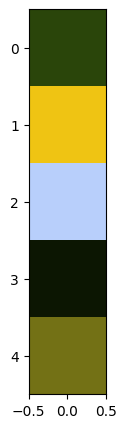

In [11]:
kmeans.cluster_centers_
colors = np.zeros((k, 1, 3), dtype=np.uint8)

for i in range(k):
    colors[i, 0, 0] = kmeans.cluster_centers_[i, 0]
    colors[i, 0, 1] = kmeans.cluster_centers_[i, 1]
    colors[i, 0, 2] = kmeans.cluster_centers_[i, 2]
    
# colors is in LAB color space, convert it to RGB color space to display it
colors = cv2.cvtColor(colors, cv2.COLOR_LAB2RGB)

# Display the colors
plt.figure(figsize=(10, 5))
plt.imshow(colors)
plt.show()

In [18]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# Function to calculate the variance of the Laplacian (measure of image noise)
def laplacian_variance(img):
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    return laplacian.var()

# Read the image
image = cv2.imread('sunflower.jpg')

# Resize the image (optional)
# image = cv2.resize(image, (640, 480))

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform K-means clustering
k = 3  # Number of clusters
pixels = gray_image.reshape((-1, 1))
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(pixels)

# Reshape the labels back to the original image
segmented_image = labels.reshape(gray_image.shape)

# Identify the noisy regions (here, we assume the region with the highest Laplacian variance is noisy)
noise_variances = [laplacian_variance((segmented_image == i).astype(np.uint8)) for i in range(k)]
noisy_region = np.argmax(noise_variances)

# Apply noise reduction to the identified noisy regions
denoised_image = np.copy(image)
region_mask = (segmented_image == noisy_region)

# Apply a Gaussian blur as a noise reduction technique
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
for c in range(3):  # Iterate over color channels
    denoised_image[..., c] = np.where(region_mask, blurred_image[..., c], denoised_image[..., c])

# Save the result
cv2.imwrite('denoised_image.jpg', denoised_image)


/home/kali1tanmay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


True